In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from scipy import stats
import os
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LinearRegression

In [2]:
X_train = pd.read_csv('datasets_f/Z_train.csv')
X_test = pd.read_csv('datasets_f/Z_test.csv')
y_train = pd.read_csv('datasets_f/y_train.csv')
y_test =pd.read_csv('datasets_f/y_test.csv')
# all have been standardscaled 

In [3]:
test = pd.read_csv('datasets_f/test.csv')

In [4]:
continuous = ['lot_frontage', 'lot_area', 'mas_vnr_area','bsmt_fin_sf_1', 'bsmt_fin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch','3ssn_porch', 'screen_porch', 'pool_area', 'misc_val']  
discrete = ['year_built','year_remod/add', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath','half_bath','bedroom_abv_gr','kitchen_abv_gr','tot_rms_abv_grd','fireplaces','garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold'] 
sale_price = ['sale_price']
numerical = continuous+discrete + sale_price

In [5]:
X_train = X_train.join(y_train['sale_price'])

In [6]:
X_train[numerical].columns

Index(['lot_frontage', 'lot_area', 'mas_vnr_area', 'bsmt_fin_sf_1',
       'bsmt_fin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'gr_liv_area', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'year_built', 'year_remod/add',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abv_gr', 'kitchen_abv_gr', 'tot_rms_abv_grd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold', 'sale_price'],
      dtype='object')

## Plotting  Correlations

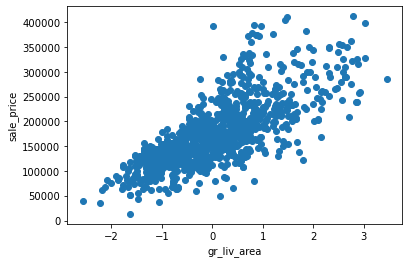

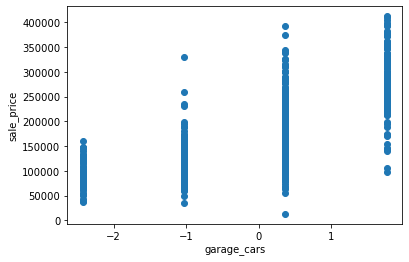

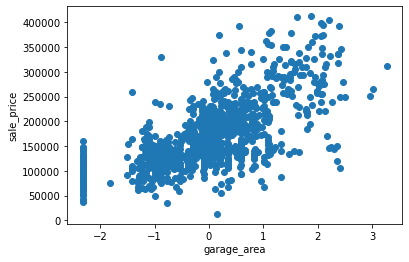

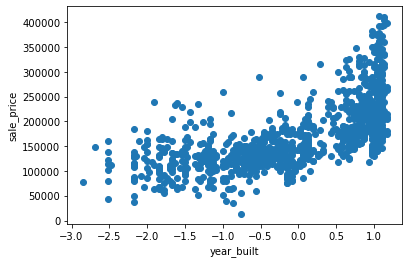

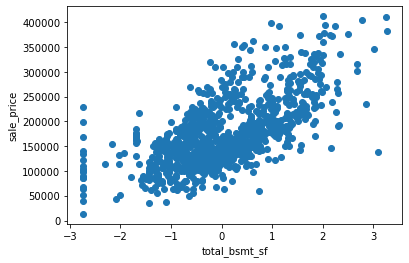

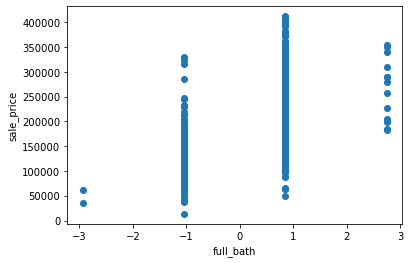

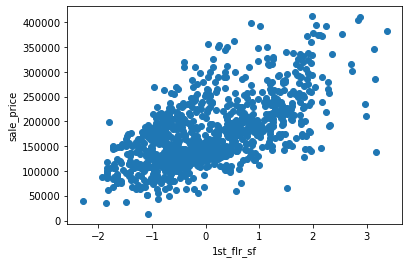

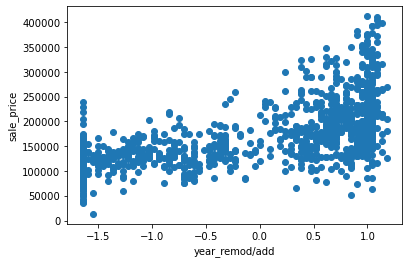

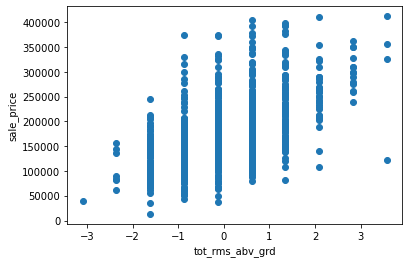

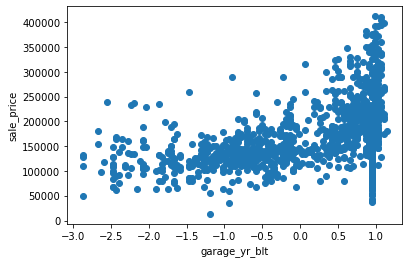

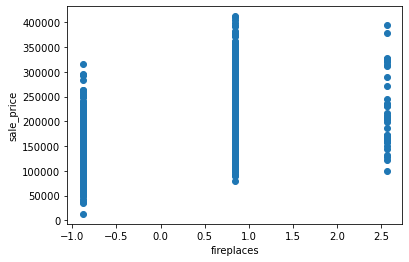

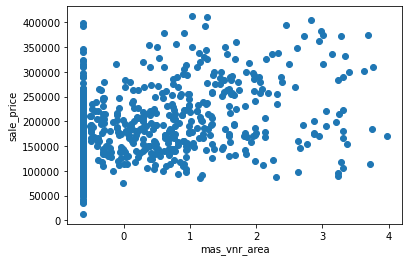

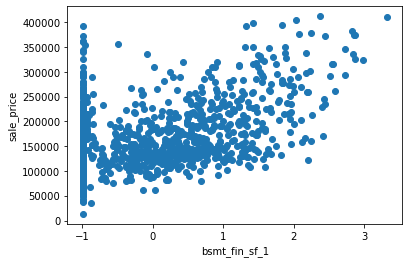

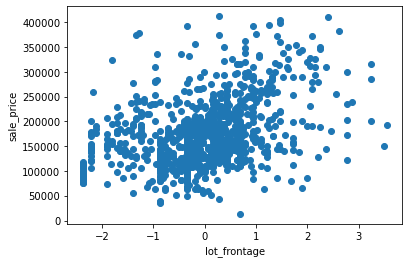

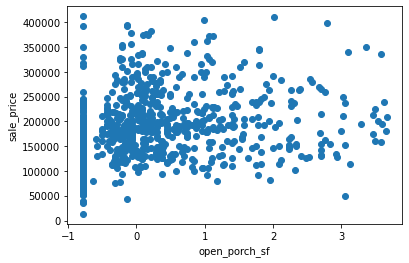

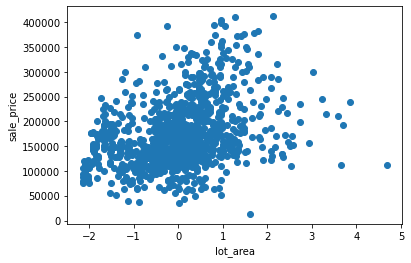

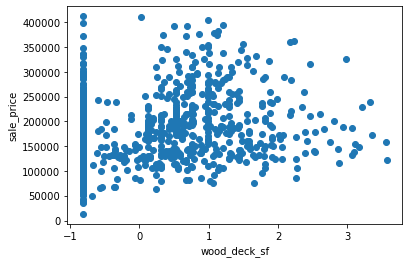

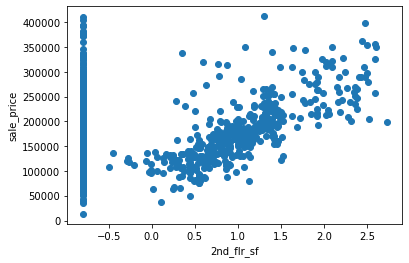

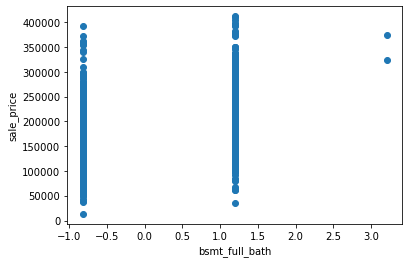

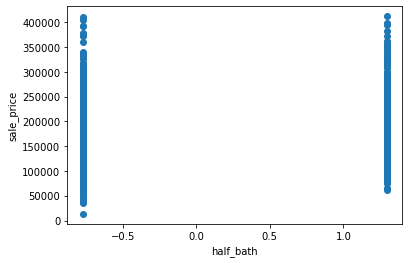

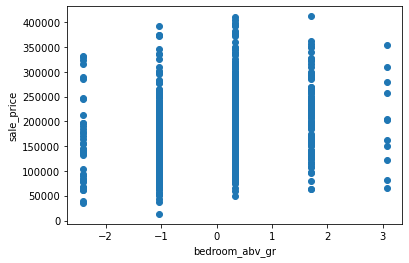

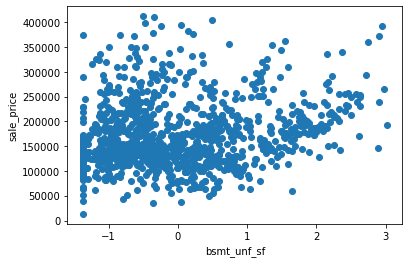

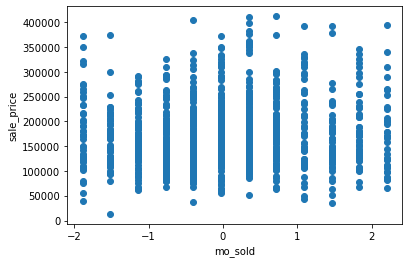

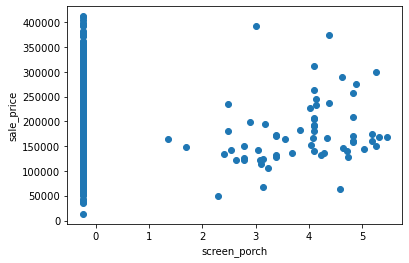

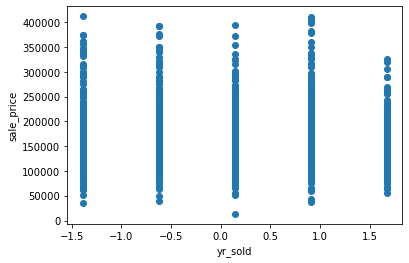

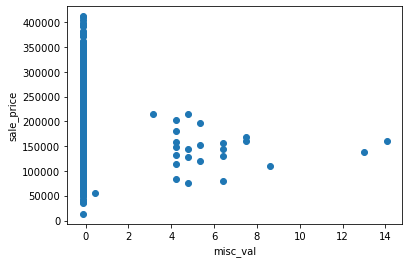

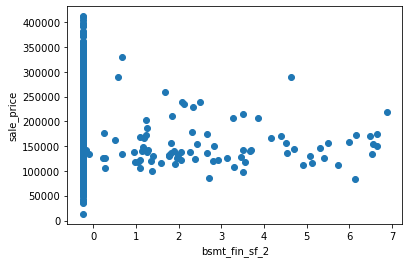

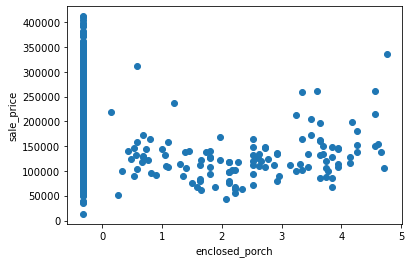

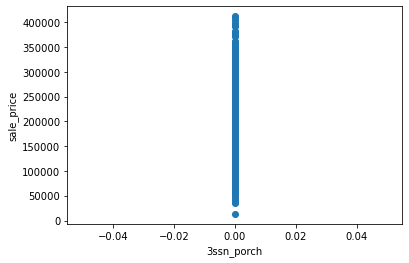

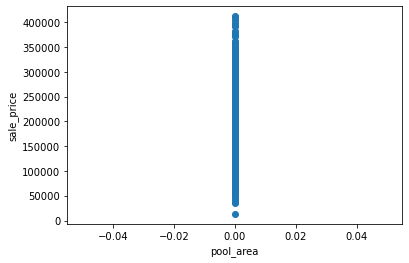

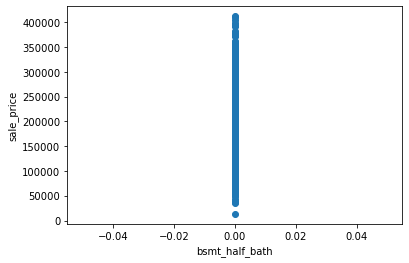

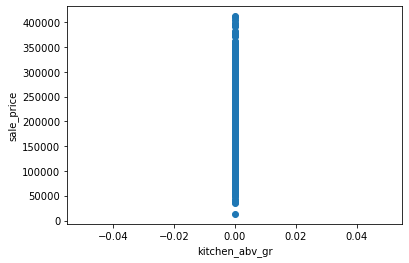

In [7]:
for col in list(X_train[numerical].corr()[['sale_price']].sort_values('sale_price', ascending=False).index.values):
    
    if col != 'sale_price':
        plt.figure()
        plt.ylabel('sale_price')
        plt.xlabel(col)
        plt.scatter(X_train[numerical][col], X_train[numerical]['sale_price']);
    else:
        pass
# for loop to print out graphs of all numerical X_train features compared to sale_price

## Heatmaps

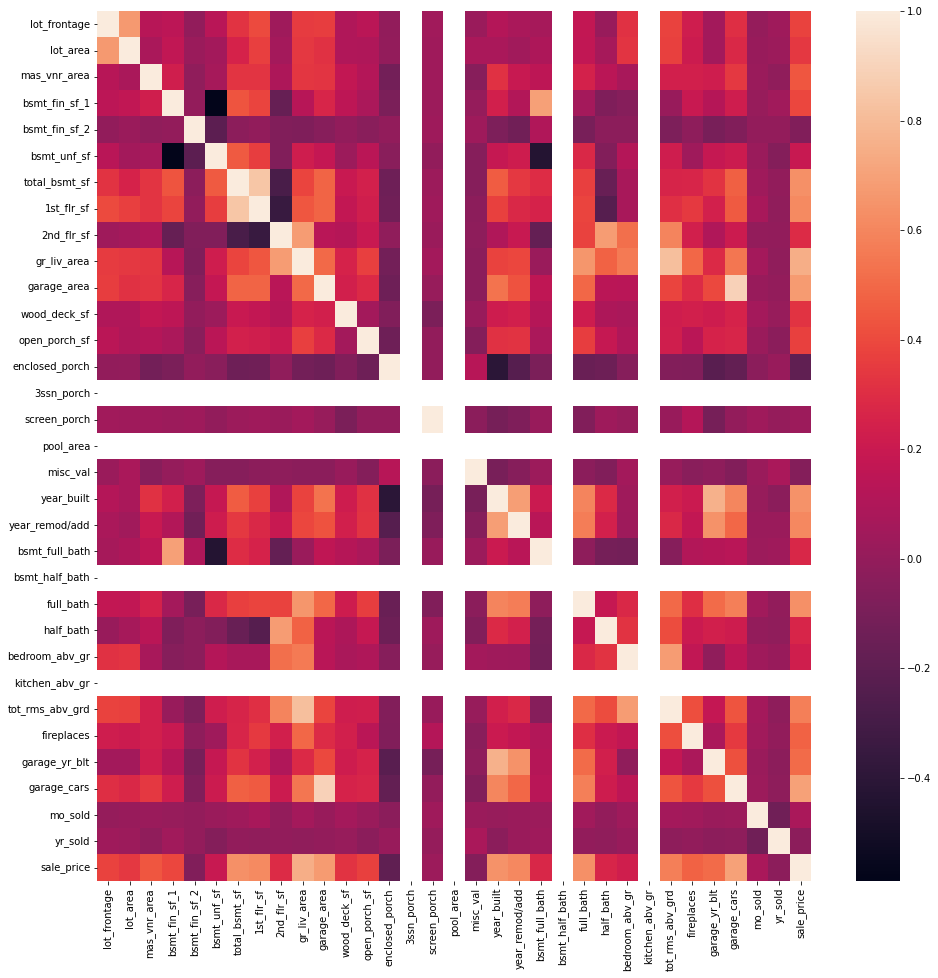

In [31]:
plt.figure(figsize=(16,16))
sns.heatmap(X_train[numerical].corr());
# better, larger heatmap which displays correlation values between features, helps with determining multicollinearity as well as figuring out which features to use

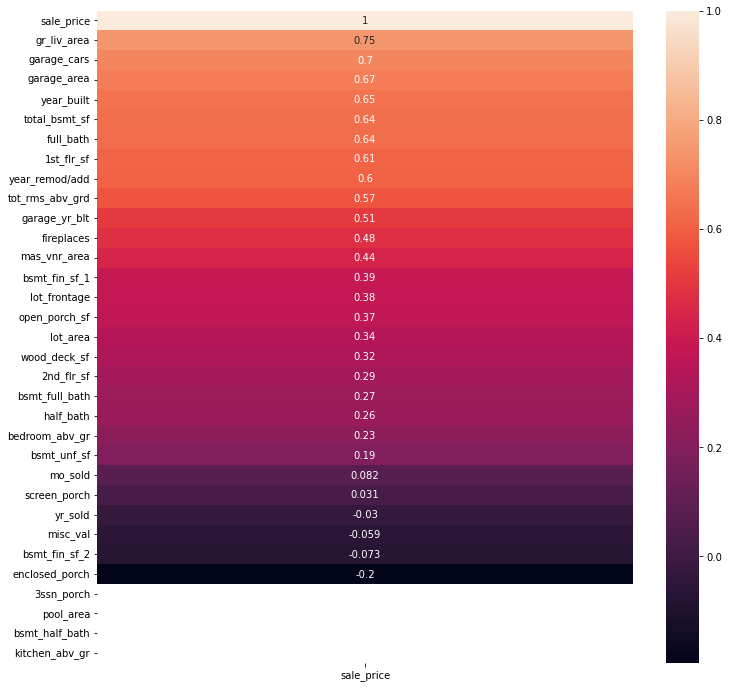

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train[numerical].corr()[['sale_price']].sort_values('sale_price',ascending=False), annot=True);
# Another heatmap to test for correlation between the features and the target variable

In [10]:
set(X_train)-set(X_train[numerical])

{'alley',
 'bldg_type_2fmCon',
 'bldg_type_Duplex',
 'bldg_type_Twnhs',
 'bldg_type_TwnhsE',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmt_fin_type_1',
 'bsmt_fin_type_2',
 'bsmt_qual',
 'central_air_Y',
 'condition_1_Feedr',
 'condition_1_Norm',
 'condition_1_PosA',
 'condition_1_PosN',
 'condition_1_RRAe',
 'condition_1_RRAn',
 'condition_2_Norm',
 'electrical',
 'exter_cond',
 'exter_qual',
 'exterior_1st_BrkFace',
 'exterior_1st_CemntBd',
 'exterior_1st_HdBoard',
 'exterior_1st_MetalSd',
 'exterior_1st_Plywood',
 'exterior_1st_Stucco',
 'exterior_1st_VinylSd',
 'exterior_1st_Wd Sdng',
 'exterior_1st_WdShing',
 'exterior_2nd_BrkFace',
 'exterior_2nd_CmentBd',
 'exterior_2nd_HdBoard',
 'exterior_2nd_ImStucc',
 'exterior_2nd_MetalSd',
 'exterior_2nd_Plywood',
 'exterior_2nd_Stucco',
 'exterior_2nd_VinylSd',
 'exterior_2nd_Wd Sdng',
 'exterior_2nd_Wd Shng',
 'fence',
 'fireplace_qu',
 'foundation_CBlock',
 'foundation_PConc',
 'foundation_Slab',
 'foundation_Stone',
 'foundation_Wood',
 'func

In [11]:
dummies = ['alley',
 'bldg_type_2fmCon',
 'bldg_type_Duplex',
 'bldg_type_Twnhs',
 'bldg_type_TwnhsE',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmt_fin_type_1',
 'bsmt_fin_type_2',
 'bsmt_qual',
 'central_air_Y',
 'condition_1_Feedr',
 'condition_1_Norm',
 'condition_1_PosA',
 'condition_1_PosN',
 'condition_1_RRAe',
 'condition_1_RRAn',
 'condition_2_Norm',
 'electrical',
 'exter_cond',
 'exter_qual',
 'exterior_1st_BrkFace',
 'exterior_1st_CemntBd',
 'exterior_1st_HdBoard',
 'exterior_1st_MetalSd',
 'exterior_1st_Plywood',
 'exterior_1st_Stucco',
 'exterior_1st_VinylSd',
 'exterior_1st_Wd Sdng',
 'exterior_1st_WdShing',
 'exterior_2nd_BrkFace',
 'exterior_2nd_CmentBd',
 'exterior_2nd_HdBoard',
 'exterior_2nd_ImStucc',
 'exterior_2nd_MetalSd',
 'exterior_2nd_Plywood',
 'exterior_2nd_Stucco',
 'exterior_2nd_VinylSd',
 'exterior_2nd_Wd Sdng',
 'exterior_2nd_Wd Shng',
 'fence',
 'fireplace_qu',
 'foundation_CBlock',
 'foundation_PConc',
 'foundation_Slab',
 'foundation_Stone',
 'foundation_Wood',
 'functional',
 'garage_cond',
 'garage_finish',
 'garage_qual',
 'garage_type_Attchd',
 'garage_type_Basment',
 'garage_type_BuiltIn',
 'garage_type_CarPort',
 'garage_type_Detchd',
 'heating_GasW',
 'heating_Grav',
 'heating_qc',
 'house_style_1.5Unf',
 'house_style_1Story',
 'house_style_2.5Unf',
 'house_style_2Story',
 'house_style_SFoyer',
 'house_style_SLvl',
 'id',
 'kitchen_qual',
 'land_contour_HLS',
 'land_contour_Low',
 'land_contour_Lvl',
 'land_slope',
 'lot_config_CulDSac',
 'lot_config_FR2',
 'lot_config_FR3',
 'lot_config_Inside',
 'lot_shape',
 'low_qual_fin_sf',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_None',
 'mas_vnr_type_Stone',
 'ms_sub_class',
 'ms_zoning_FV',
 'ms_zoning_RH',
 'ms_zoning_RL',
 'ms_zoning_RM',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_IDOTRR',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',
 'neighborhood_Veenker',
 'overall_cond',
 'overall_qual',
 'paved_drive',
 'pid',
 'roof_matl_Tar&Grv',
 'roof_style_Gable',
 'roof_style_Gambrel',
 'roof_style_Hip',
 'roof_style_Mansard',
 'sale_type_CWD',
 'sale_type_ConLD',
 'sale_type_ConLI',
 'sale_type_ConLw',
 'sale_type_New',
 'sale_type_Oth',
 'sale_type_WD ',
 'street_Pave',
 'utilities']
categorical = dummies + sale_price

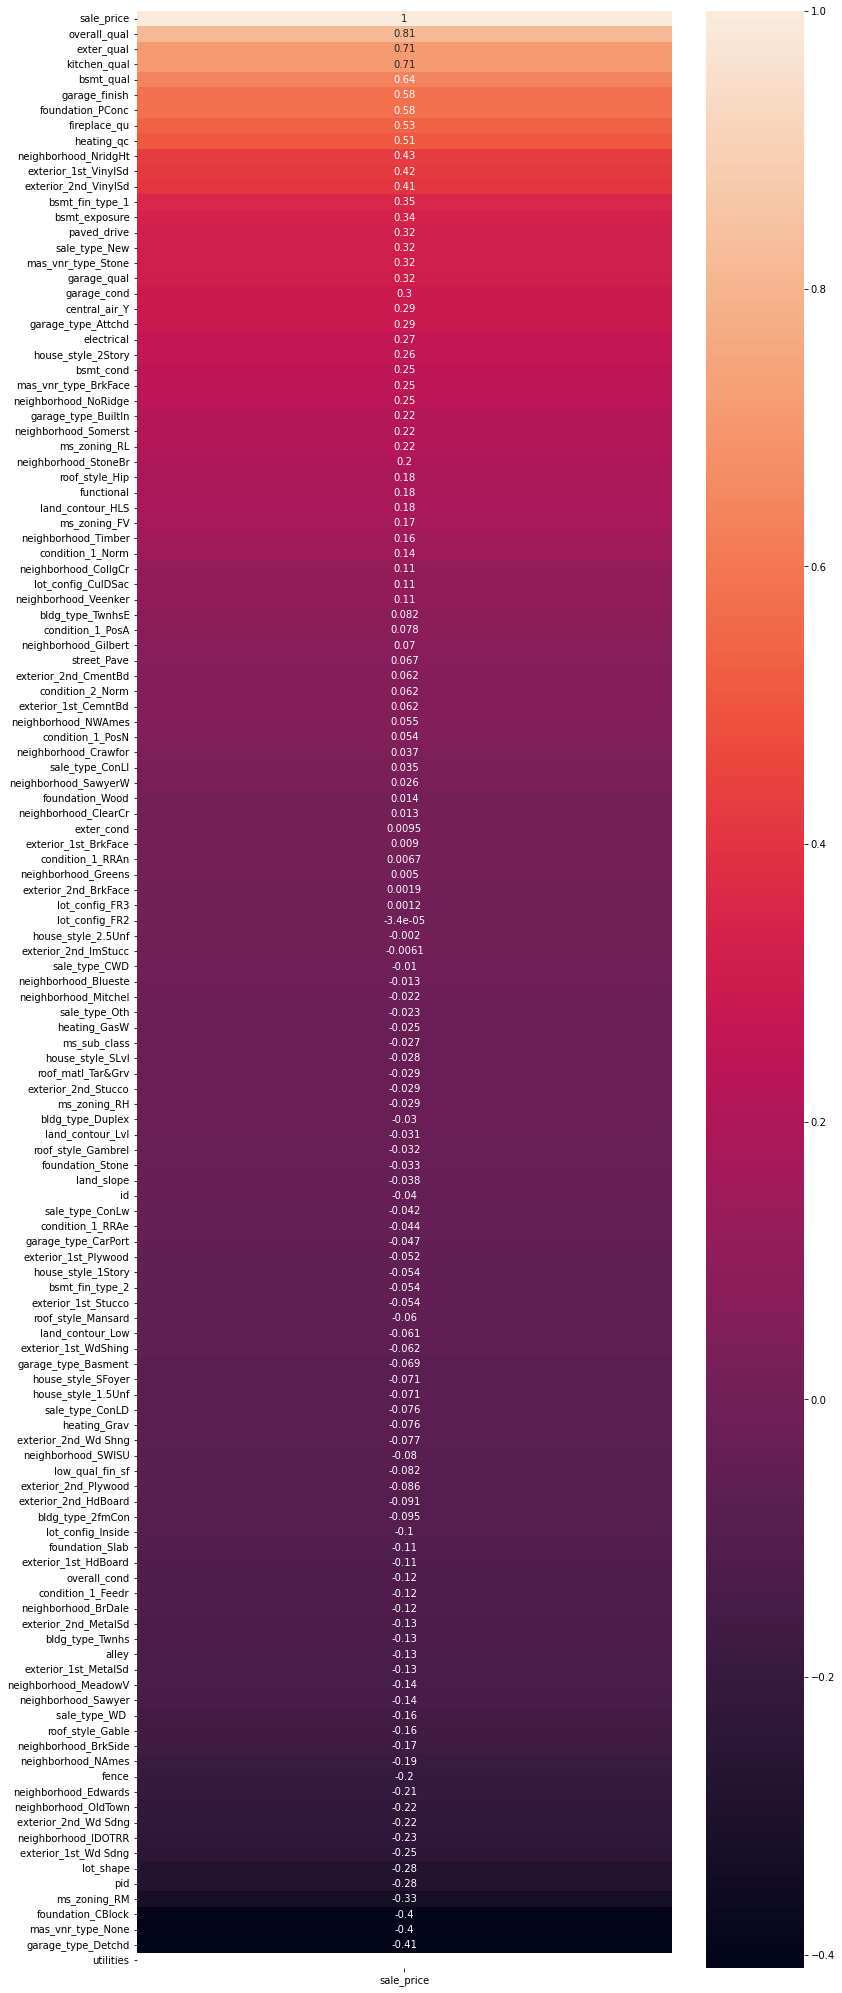

In [12]:
plt.figure(figsize=(12,36))
sns.heatmap(X_train[categorical].corr()[['sale_price']].sort_values('sale_price',ascending=False), annot=True);

In [13]:
high_num =['gr_liv_area','year_built','garage_area','total_bsmt_sf','full_bath']

In [14]:
high_cat = ['overall_qual','exter_qual','bsmt_qual', 'foundation_PConc']

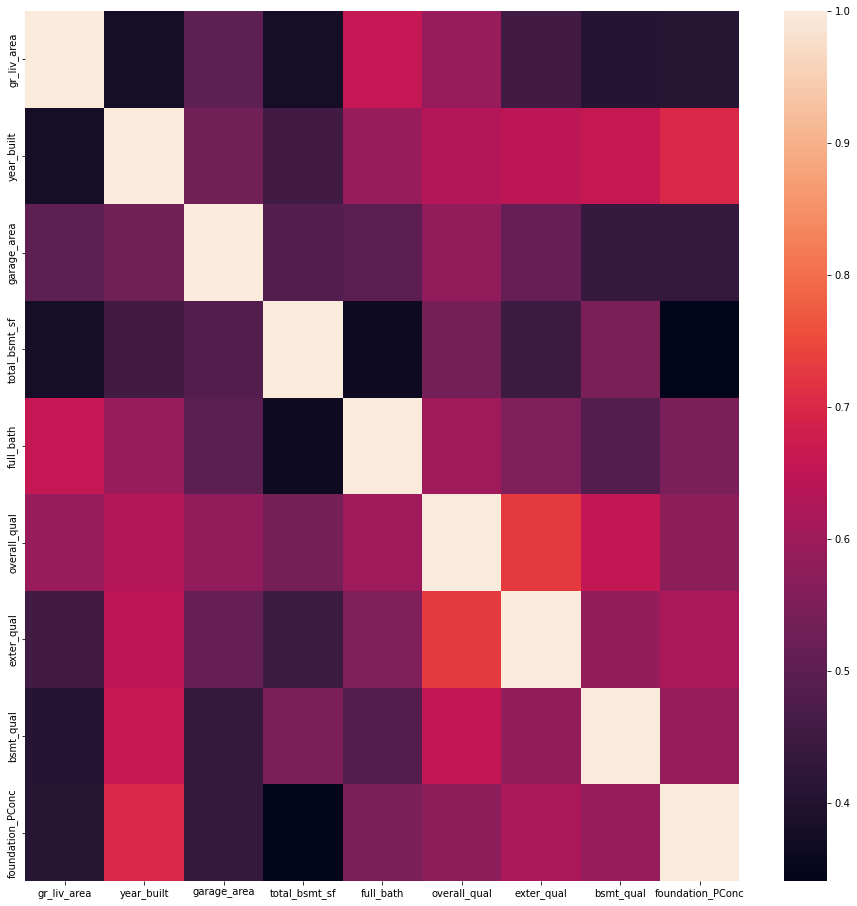

In [30]:
plt.figure(figsize=(16,16))
sns.heatmap(X_train[high_num+high_cat].corr());
# checking for multicollinearity between features

## More Pairplots between Numerical Features with High Correlation to Target Variable

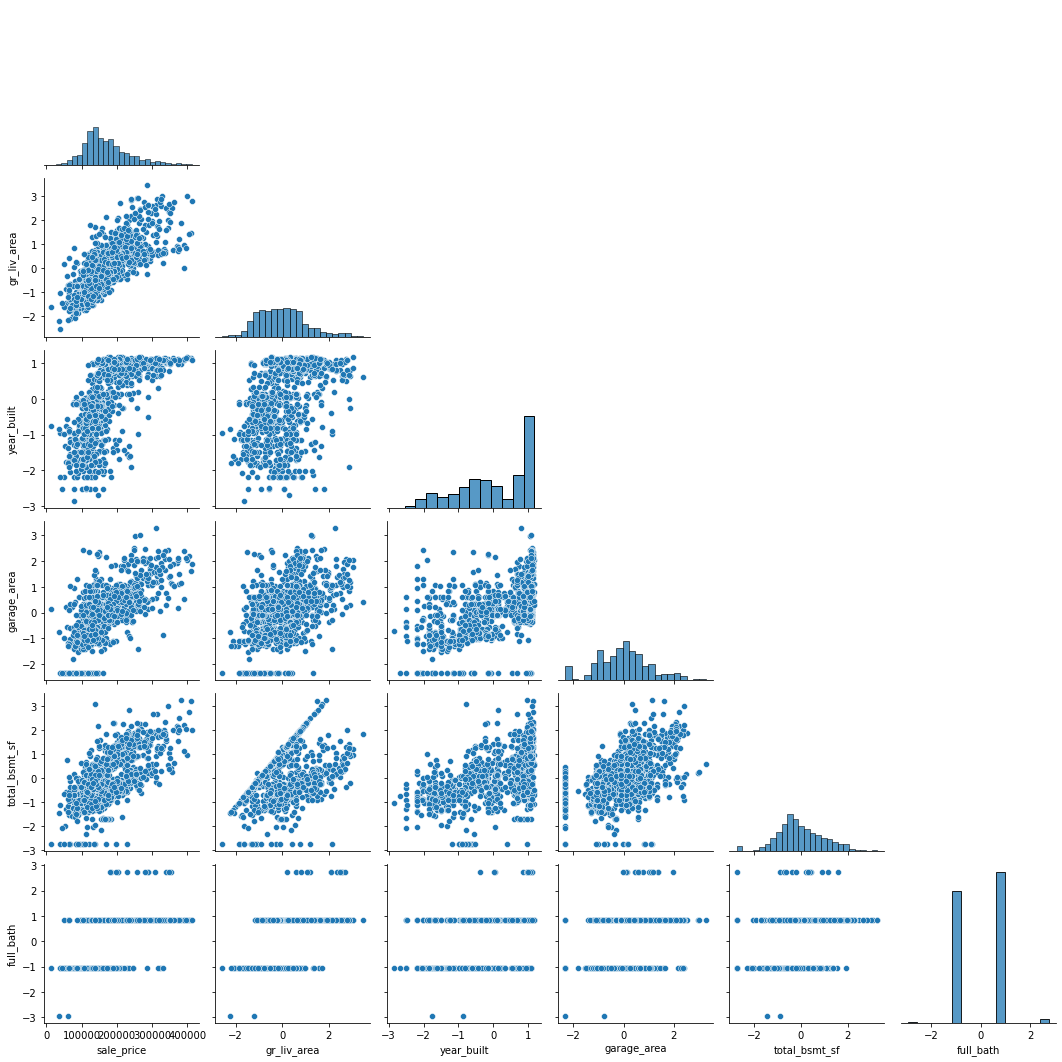

In [29]:
sns.pairplot(X_train[['sale_price','gr_liv_area','year_built','garage_area','total_bsmt_sf','full_bath']], corner=True);
# visualizing relation between numerical features with the highest correlations and the target variable the sale price

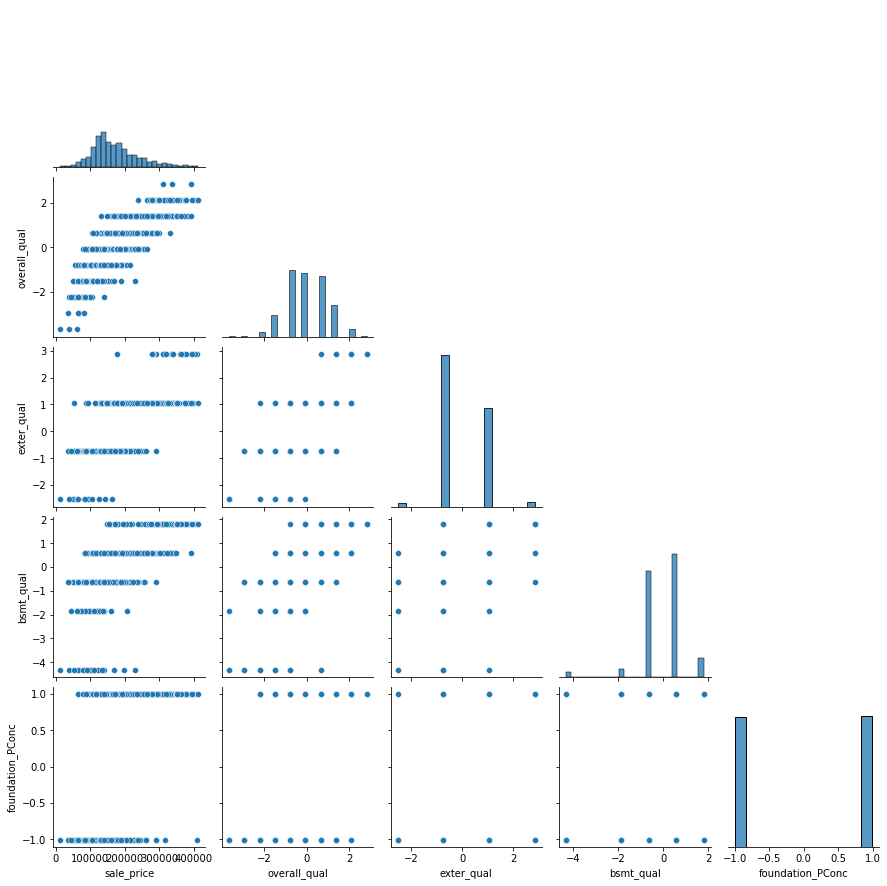

In [28]:
sns.pairplot(X_train[['sale_price','overall_qual','exter_qual','bsmt_qual', 'foundation_PConc']], corner=True);
# visualizing relation between categorical features with the highest correlations and the target variable the sale price

## Histograms of House Sale Price Distribution

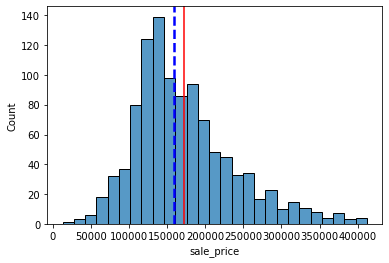

In [26]:
sns.histplot(y_train['sale_price']);
plt.axvline(x=y_train.sale_price.median(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.axvline(x=y_train.sale_price.mean(),
            color='red');
# checking to see distribution of sale prices in training set, right skew 
# red line is mean, blue line is median

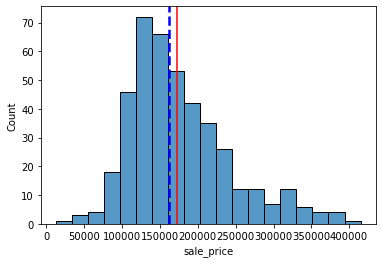

In [27]:
sns.histplot(y_test['sale_price']);
plt.axvline(x=y_test.sale_price.median(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.axvline(x=y_train.sale_price.mean(),
            color='red');
# checking to see distribution of sale prices in test set, right skew 
# red line is mean, blue line is median